In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os, os.path, shutil

folder_path = "/content/drive/My Drive/DS"

images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

for image in images:
    folder_name = image.split('_')[0]

    new_path = os.path.join(folder_path, folder_name)
    if not os.path.exists(new_path):
        os.makedirs(new_path)

    old_image_path = os.path.join(folder_path, image)
    new_image_path = os.path.join(new_path, image)
    shutil.move(old_image_path, new_image_path)

In [8]:
def resize(path):
  for item in os.listdir(path):
    if os.path.isfile(item):
        im = Image.open(item)
        f, e = os.path.splitext(item)
        imResize = im.resize((32,32), Image.ANTIALIAS)
        imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

resize('/content/drive/My Drive/DS/Head')
resize('/content/drive/My Drive/DS/Chest')
resize('/content/drive/My Drive/DS/Abdomen')

In [16]:
pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio("/content/drive/My Drive/DS", output="/content/drive/My Drive/DS/ot", seed=1337, ratio=(.8, .1, .1), group_prefix=None) 



In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model

In [3]:
train_data_dir = '/content/drive/My Drive/DS/ot/train'
validation_data_dir = '/content/drive/My Drive/DS/ot/val'

In [4]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

def load_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 3)
    return files, targets

train_files, train_targets = load_data('/content/drive/My Drive/DS/ot/train')
test_files, test_targets = load_data('/content/drive/My Drive/DS/ot/test')
valid_files, valid_targets = load_data('/content/drive/My Drive/DS/ot/val')

catagory_names = [item[9:-1] for item in sorted(glob("/content/drive/My Drive/DS/ot/train/*/"))]


In [59]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [60]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

train_t = paths_to_tensor(train_files).astype('float32')/255
test_t = paths_to_tensor(test_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255

100%|██████████| 450/450 [00:00<00:00, 708.93it/s]


In [61]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

def create_model():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(filters=96, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.1))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu', name='final_layer'))
    model.add(Dense(3, activation='softmax'))

    model.summary()
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [62]:
train_model = create_model()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 64)         

In [63]:
test_model = create_model()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 64)         

In [64]:
from keras.callbacks import ModelCheckpoint  

def run_model(model, X, y, epochs, save_file):

    checkpointer = ModelCheckpoint(filepath='saved_models/' + save_file, 
                                   verbose=1, save_best_only=True)

    model.fit(X, y, validation_data=(valid_tensors, valid_targets),
              epochs=epochs, batch_size=7, callbacks=[checkpointer], verbose=1)
    
    return model

In [66]:
train_model = run_model(train_model, train_t, train_targets, 20, 'weights.best.from_scratch.hdf5')

Epoch 1/20
171/172 [============================>.] - ETA: 0s - loss: 9.0627e-09 - accuracy: 1.0000
Epoch 00001: val_loss improved from inf to 0.00015, saving model to saved_models/weights.best.from_scratch.hdf5
172/172 [==============================] - 3s 15ms/step - loss: 9.0400e-09 - accuracy: 1.0000 - val_loss: 1.5231e-04 - val_accuracy: 1.0000
Epoch 2/20
172/172 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9975
Epoch 00002: val_loss improved from 0.00015 to 0.00000, saving model to saved_models/weights.best.from_scratch.hdf5
172/172 [==============================] - 2s 15ms/step - loss: 0.0401 - accuracy: 0.9975 - val_loss: 4.8743e-08 - val_accuracy: 1.0000
Epoch 3/20
169/172 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9966
Epoch 00003: val_loss improved from 0.00000 to 0.00000, saving model to saved_models/weights.best.from_scratch.hdf5
172/172 [==============================] - 2s 14ms/step - loss: 0.0117 - accuracy: 0.996

In [67]:
test_model = run_model(test_model, test_t, test_targets, 20, 'weights.best.from_test_scratch.hdf5')

Epoch 1/20
41/43 [===========================>..] - ETA: 0s - loss: 0.8704 - accuracy: 0.5261
Epoch 00001: val_loss improved from inf to 0.49976, saving model to saved_models/weights.best.from_test_scratch.hdf5
43/43 [==============================] - 1s 22ms/step - loss: 0.8580 - accuracy: 0.5300 - val_loss: 0.4998 - val_accuracy: 0.6711
Epoch 2/20
43/43 [==============================] - ETA: 0s - loss: 0.4771 - accuracy: 0.7300
Epoch 00002: val_loss improved from 0.49976 to 0.32539, saving model to saved_models/weights.best.from_test_scratch.hdf5
43/43 [==============================] - 1s 19ms/step - loss: 0.4771 - accuracy: 0.7300 - val_loss: 0.3254 - val_accuracy: 0.9467
Epoch 3/20
39/43 [==========================>...] - ETA: 0s - loss: 0.3981 - accuracy: 0.8352
Epoch 00003: val_loss did not improve from 0.32539
43/43 [==============================] - 1s 18ms/step - loss: 0.3903 - accuracy: 0.8367 - val_loss: 0.3820 - val_accuracy: 0.7289
Epoch 4/20
43/43 [=====================

In [68]:
p = [np.argmax(train_model.predict(np.expand_dims(feature, axis=0))) for feature in test_t]

test_accuracy = 100*np.sum(np.array(p)==np.argmax(test_targets, axis=1))/len(p)
print('Test accuracy: %.4f%%' % test_accuracy)


Test accuracy: 100.0000%


In [69]:
from keras.models import Model

new_train_model = Model(inputs=train_model.input,outputs=train_model.get_layer('final_layer').output)
new_test_model = Model(inputs=test_model.input,outputs=test_model.get_layer('final_layer').output)

x_train = new_train_model.predict(train_t)
x_test = new_test_model.predict(test_t)

y_train = [np.where(r==1)[0][0] for r in train_targets]
y_test = [np.where(r==1)[0][0] for r in test_targets]

In [70]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
knn_model = {}

K = [3, 5, 7, 9]
error = []
for i in K:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(x_train, y_train)
    knn_model[i] = knn
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))
    eval("print(\"k=" + str(i) + ":{}\".format(accuracy_score(y_test, pred)))")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

k=3:0.3333333333333333
[[  0 100   0]
 [  0 100   0]
 [100   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100
           2       0.00      0.00      0.00       100

    accuracy                           0.33       300
   macro avg       0.17      0.33      0.22       300
weighted avg       0.17      0.33      0.22       300

k=5:0.3333333333333333
[[  0 100   0]
 [  0 100   0]
 [100   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100
           2       0.00      0.00      0.00       100

    accuracy                           0.33       300
   macro avg       0.17      0.33      0.22       300
weighted avg       0.17      0.33      0.22       300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k=7:0.3333333333333333
[[  0 100   0]
 [  0 100   0]
 [100   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100
           2       0.00      0.00      0.00       100

    accuracy                           0.33       300
   macro avg       0.17      0.33      0.22       300
weighted avg       0.17      0.33      0.22       300

k=9:0.41333333333333333
[[ 25  75   0]
 [  1  99   0]
 [100   0   0]]
              precision    recall  f1-score   support

           0       0.20      0.25      0.22       100
           1       0.57      0.99      0.72       100
           2       0.00      0.00      0.00       100

    accuracy                           0.41       300
   macro avg       0.26      0.41      0.31       300
weighted avg       0.26      0.41      0.31       300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Mean Error')

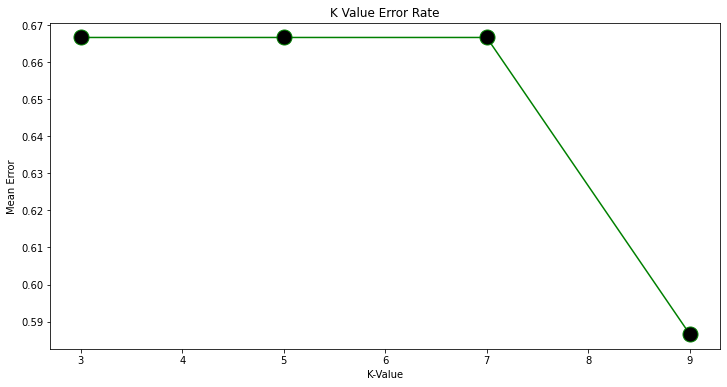

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(K, error, color='green', linestyle='solid', marker='.',
         markerfacecolor='black', markersize=30)
plt.title('K Value Error Rate')
plt.xlabel('K-Value')
plt.ylabel('Mean Error')

In [72]:
import pickle

In [73]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier

forest =  RandomForestClassifier(max_depth=5, n_estimators=100, criterion='gini' )

distributions = dict(max_depth=[2, 5, 10], n_estimators=[10, 50, 100], criterion=['gini', 'entropy'])

cval = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

scorer = make_scorer(accuracy_score)

clf = RandomizedSearchCV(forest, distributions, scoring=scorer,  cv=cval)
search = clf.fit(x_train, y_train)

print('best parms:')
search.best_params_

best parms:


{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 10}

In [74]:
rf_predictions = search.predict(x_test)

In [75]:
print('Accuracy Score')
accuracy_score(y_test, rf_predictions)

Accuracy Score


0.42333333333333334

In [76]:
print('Confusion Matrix')
print(confusion_matrix(y_test, rf_predictions))

Confusion Matrix
[[100   0   0]
 [ 73  27   0]
 [100   0   0]]


In [77]:
print('Report')
print(classification_report(y_test, rf_predictions))

Report
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       100
           1       1.00      0.27      0.43       100
           2       0.00      0.00      0.00       100

    accuracy                           0.42       300
   macro avg       0.46      0.42      0.32       300
weighted avg       0.46      0.42      0.32       300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
import os
knn_filename = "/content/drive/My Drive/DS/ot/1111407-KNN.pkl"
rf_filename = "/content/drive/My Drive/DS/ot/1111407-RF.pkl"

with open(knn_filename, 'wb') as file:
    pickle.dump(knn_model[9], file)
    
with open(rf_filename, 'wb') as file:
    pickle.dump(search, file)


os.remove(knn_filename)
os.remove(rf_filename)


In [79]:
with open(knn_filename, 'wb') as file:
    pickle.dump(knn_model[9], file)
    
with open(rf_filename, 'wb') as file:
    pickle.dump(search, file)

In [80]:
with open(knn_filename, 'rb') as file:
    best_knn = pickle.load(file)
    
with open(rf_filename, 'rb') as file:
    best_rf = pickle.load(file)

In [81]:
import cv2
def predict(file, algo):
    
    img = cv2.imread(file)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    
    tesnor = path_to_tensor(file).astype('float32')/255
    x = new_train_model.predict(tesnor)
    pred = -1
    
    if algo == 'knn':
        pred = best_knn.predict(x)[0]
    elif algo == 'rf': 
        pred = best_rf.predict(x)[0]

    if pred == 0:
        res = 'Abdomen'
    elif pred == 1:
        res = 'Chest'
    elif pred == 2:
        res = 'Head'
    else: 
        return 'error'

    return res + ' - by ' + algo

File: /content/drive/My Drive/DS/ot/val/Chest/Chest_CT Sample#83.jpeg
Detected: Chest - by knn


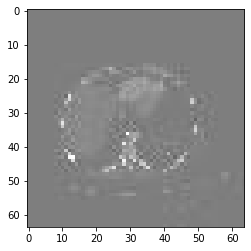

In [82]:

print('File: ' +  valid_files[3])
result = predict(valid_files[3], 'knn')
print('Detected: ' + result)

File: /content/drive/My Drive/DS/ot/val/Chest/Chest_CT Sample#476.jpeg
Detected: Chest - by rf


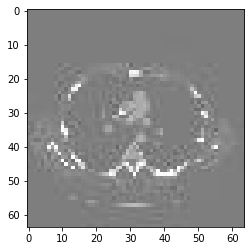

In [83]:
print('File: ' +  valid_files[8])
result = predict(valid_files[8], 'rf')
print('Detected: ' + result)